In [1]:
# Sezione 1: Assicura anomalib e le librerie necessarie
# Evita l'uso diretto di '!pip install anomalib[full]' perché zsh espande le parentesi quadre.
# Usiamo un approccio sicuro: proviamo a importare i pacchetti e, se mancanti, eseguiamo pip tramite lo stesso interprete Python (sys.executable).
import importlib, subprocess, sys
required = ['anomalib', 'torch', 'torchvision', 'matplotlib']
missing = []
for pkg in required:
    try:
        importlib.import_module(pkg)
    except Exception:
        missing.append(pkg)
if missing:
    # If anomalib is missing we attempt to install the 'full' extra.
    to_install = []
    if 'anomalib' in missing:
        # install anomalib with extras using explicit quoting to avoid shell expansion
        to_install.append('anomalib[full]')
        missing.remove('anomalib')
    # add remaining missing packages
    to_install.extend(missing)
    if to_install:
        print('Installing packages:', to_install)
        cmd = [sys.executable, '-m', 'pip', 'install'] + to_install
        subprocess.check_call(cmd)
        print('Installation finished. You might need to restart the kernel to use newly installed packages.')
else:
    print('All required packages are already installed in this environment.')

All required packages are already installed in this environment.


In [2]:
# Importa le librerie fondamentali
import torch
import numpy as np
import matplotlib.pyplot as plt

# Imposta il seed per la riproducibilità
np.random.seed(42)
torch.manual_seed(42)

# Imposta tema scuro per matplotlib
plt.style.use('dark_background')

In [4]:
category = "screw"  # Puoi cambiare categoria (es. "bottle", "cable", "capsule", ecc.)
from pathlib import Path
from anomalib.data.datasets import MVTecADDataset
dataset = MVTecADDataset(
    root=Path("./.dataset/mvtecad"),
    category=category
)

In [5]:
dataset.samples.head()

,path,split,label,image_path,label_index,mask_path
0,/Users/qwerty/coding/test_notebook/.dataset/mv...,test,good,/Users/qwerty/coding/test_notebook/.dataset/mv...,0,None
1,/Users/qwerty/coding/test_notebook/.dataset/mv...,test,good,/Users/qwerty/coding/test_notebook/.dataset/mv...,0,None
2,/Users/qwerty/coding/test_notebook/.dataset/mv...,test,good,/Users/qwerty/coding/test_notebook/.dataset/mv...,0,None
3,/Users/qwerty/coding/test_notebook/.dataset/mv...,test,good,/Users/qwerty/coding/test_notebook/.dataset/mv...,0,None
4,/Users/qwerty/coding/test_notebook/.dataset/mv...,test,good,/Users/qwerty/coding/test_notebook/.dataset/mv...,0,None


In [6]:
df = dataset.samples.copy()

In [7]:
test_img_path = df.iloc[17,3]

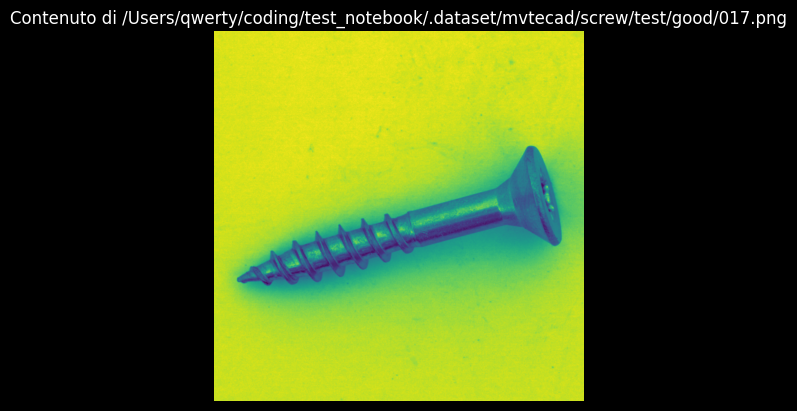

In [8]:
from PIL import Image
import numpy as np

# Carica e mostra l'immagine dal path test_img_path
img = Image.open(test_img_path)
plt.imshow(np.asarray(img))
plt.title(f'Contenuto di {test_img_path}')
plt.axis('off')
plt.show()

In [9]:
print(np.asarray(img)[:2])

[[192 191 191 ... 185 187 190]
 [190 190 190 ... 187 188 190]]


In [ ]:
# Controlli diagnostici dettagliati per GPU/CUDA
import torch
import sys
import subprocess

print("=== DIAGNOSI GPU/CUDA ===")
print(f"Versione Python: {sys.version}")
print(f"Versione PyTorch: {torch.__version__}")

# 1. Verifica CUDA disponibilità
print(f"\ntorch.cuda.is_available(): {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA device count: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"  Device {i}: {torch.cuda.get_device_name(i)}")
        print(f"  Memory: {torch.cuda.get_device_properties(i).total_memory / 1024**3:.1f} GB")
else:
    print("CUDA non disponibile")

# 2. Verifica versione CUDA compilata in PyTorch
print(f"\nCUDA version compilata in PyTorch: {torch.version.cuda}")

# 3. Verifica se PyTorch è stato compilato con supporto CUDA
print(f"PyTorch compilato con CUDA: {torch.cuda.is_available()}")

# 4. Verifica driver NVIDIA (se su Windows)
try:
    result = subprocess.run(['nvidia-smi'], capture_output=True, text=True, shell=True)
    if result.returncode == 0:
        print(f"\nnvidia-smi output:")
        print(result.stdout)
    else:
        print(f"\nnvidia-smi non trovato o errore: {result.stderr}")
except Exception as e:
    print(f"\nErrore nell'eseguire nvidia-smi: {e}")

# 5. Verifica variabili d'ambiente CUDA
import os
cuda_path = os.environ.get('CUDA_PATH', 'Non trovato')
cuda_home = os.environ.get('CUDA_HOME', 'Non trovato')
print(f"\nCUDA_PATH: {cuda_path}")
print(f"CUDA_HOME: {cuda_home}")

print("\n=== FINE DIAGNOSI ===")

In [ ]:
# AUTOMATIZZAZIONE: Reinstallazione PyTorch con supporto CUDA
import subprocess
import sys

def reinstall_pytorch_cuda():
    """Reinstalla PyTorch con supporto CUDA"""
    try:
        print("🔄 Disinstallazione PyTorch CPU-only...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'uninstall', 'torch', 'torchvision', 'torchaudio', '-y'])
        
        print("📦 Installazione PyTorch con supporto CUDA 12.1...")
        subprocess.check_call([
            sys.executable, '-m', 'pip', 'install', 
            'torch', 'torchvision', 'torchaudio',
            '--index-url', 'https://download.pytorch.org/whl/cu121'
        ])
        
        print("✅ Installazione completata!")
        print("⚠️  IMPORTANTE: Riavvia il kernel del notebook per applicare le modifiche!")
        return True
        
    except Exception as e:
        print(f"❌ Errore durante l'installazione: {e}")
        return False

# Decommentare la riga sotto per eseguire la reinstallazione
# reinstall_pytorch_cuda()

In [ ]:
# ✅ VERIFICA FINALE: GPU ora dovrebbe funzionare!
# IMPORTANTE: Prima di eseguire questa cella, riavvia il kernel del notebook!

import torch
print("🔍 VERIFICA FINALE DOPO REINSTALLAZIONE:")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"✅ SUCCESS! GPU rilevata: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
    
    # Test rapido di allocazione GPU
    device = torch.device("cuda")
    test_tensor = torch.randn(1000, 1000).to(device)
    print(f"✅ Test allocazione GPU: OK ({test_tensor.device})")
    del test_tensor
    torch.cuda.empty_cache()
else:
    print("❌ CUDA ancora non disponibile. Assicurati di aver riavviato il kernel!")

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.cluster import KMeans
import numpy as np
import os
from PIL import Image

# Determina il device corretto per Mac (MPS), CUDA (Windows/Linux), o CPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using device: {device} ({torch.cuda.get_device_name(0)})")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Using device: {device} (Apple Silicon MPS)")
else:
    device = torch.device("cpu")
    print("Using device: cpu")



In [ ]:
# Definisci MVTecDataset all'inizio del modulo principale
class MVTecDataset(torch.utils.data.Dataset):
    def __init__(self, category, train=True, transform=None):
        self.transform = transform
        self.train = train
        path = os.path.join(".dataset/mvtecad", category, "train" if train else "test")
        self.good_path = os.path.join(path, "good")
        self.image_paths = []
        self.labels = []
        self.subfolders = []

        if train:
            # Solo immagini good per il training
            self.image_paths = [os.path.join(self.good_path, f) for f in os.listdir(self.good_path) 
                                if f.endswith(('.png', '.jpg', '.jpeg'))]
        else:
            # Per il test: crea sottocartelle per ogni tipo (comprese good)
            for defect_type in os.listdir(path):
                defect_path = os.path.join(path, defect_type)
                if os.path.isdir(defect_path):
                    files = [f for f in os.listdir(defect_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
                    for f in files:
                        self.image_paths.append(os.path.join(defect_path, f))
                        self.labels.append(defect_type)
                        self.subfolders.append(defect_type)

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        if self.transform:
            img = self.transform(img)
        if self.train:
            return img
        else:
            # Restituisci anche la sottocartella (defect_type) e il nome file
            file_name = os.path.basename(self.image_paths[idx])
            defect_type = self.subfolders[idx]
            return img, defect_type, file_name

# Transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Modello convoluzionale
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.conv1 = nn.Conv2d(3, 25, kernel_size=5 , padding=2 , padding_mode='replicate')  # Mantieni dimensioni
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(25, 50, kernel_size=3, padding=1, padding_mode='replicate') 
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(50, 75, kernel_size=3, padding=1, padding_mode='replicate')
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(75, 100, kernel_size=3, padding=1, padding_mode='replicate')
        self.relu4 = nn.ReLU()

    def forward(self, x):
        x = self.relu1(self.conv1(x))  # 25x256x256
        x = self.relu2(self.conv2(x))  # 50x256x256
        x = self.relu3(self.conv3(x))  # 75x256x256
        x = self.relu4(self.conv4(x))  # 100x256x256
        return x

In [ ]:
# Funzioni di supporto
def extract_compact_patches(
    features: torch.Tensor, 
    patch_size=3, 
    reduction='mean', 
    stride=1, 
    padding=0
    ) -> torch.Tensor:
    """
    Estrae patch da una feature map 4D usando sliding window (simile a una convoluzione), con supporto per stride e padding.

    Args:
        features: torch.Tensor di shape (batch, channels, height, width)
        patch_size: dimensione della patch quadrata (es: 5 -> 5x5)
        reduction: Metodo di riduzione ('mean' per media, 'max' per massimo, o altro)
        stride: Passo della finestra (default=1)
        padding: Padding da applicare ai bordi (default=0)

    Returns:
        patches_reduced: torch.Tensor di shape (num_patches_totali, channels)

    Notes:
        - Ogni patch viene ridotta a un vettore 1D per canale (utile per clustering o altre analisi).
        - La funzione restituisce un array 2D (num_patches_totali, channels).

    Examples:
        # Esempio con immagine 4x4 a 3 canali
        img = torch.arange(4*4*3).reshape(1,3,4,4).float()
        print("Input shape:", img.shape)
        print("Input[0,0]:\n", img[0,0])
        patches = extract_compact_patches(img, patch_size=2, stride=2)
        print("Patches shape:", patches.shape)  # (4, 3)
        print("Patches:\n", patches)
        # Ogni riga di patches è la media dei valori di una patch 2x2 per ogni canale

        # Esempio con feature map (2, 3, 16, 16)
        features = torch.randn(2, 3, 16, 16)
        patches = extract_compact_patches(features, patch_size=5, stride=2)
        print(patches.shape)  # (num_patches_totali, 3)
        print(patches[0])     # Vettore 1D di lunghezza 3 (media di ogni canale)
        print(patches[:5])    # Prime 5 patch
        print(patches.mean(dim=0))  # Media globale per canale
    """
    # Applica padding se richiesto
    if padding > 0:
        features = torch.nn.functional.pad(features, (padding, padding, padding, padding))

    batch_size, channels, height, width = features.shape

    # Estrai patch con unfold su height e width
    patches = features.unfold(2, patch_size, stride).unfold(3, patch_size, stride)
    # patches shape: (batch, channels, num_patches_h, num_patches_w, patch_size, patch_size)

    # Porta tutte le patch in una sola dimensione
    patches = patches.contiguous().view(batch_size, channels, -1, patch_size, patch_size)  # (batch, channels, num_patches, patch_size, patch_size)

    # Calcola la media su ogni patch per ogni canale
    # Risultato: (batch, channels, num_patches)
    patches_reduced = patches.mean(dim=[3, 4])

    # Porta la dimensione dei canali in fondo: (batch, num_patches, channels)
    patches_reduced = patches_reduced.permute(0, 2, 1)

    # Unisci tutti i batch in una sola dimensione: (num_patches_totali, channels)
    patches_reduced = patches_reduced.reshape(-1, channels)

    return patches_reduced

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt

# Carica l'immagine
good_image_path = "002.png"
good_img = Image.open(good_image_path).resize((256, 256))
# Plotta l'immagine
plt.imshow(good_img)
print(f"Dimensioni immagine: {np.asarray(good_img).shape}")
plt.title("aaa.jpg")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np

# Convert the PIL.Image object to a NumPy array
good_img_np = np.asarray(good_img)

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i in range(3):
    axs[i].imshow(good_img_np[..., i], cmap='gray')
    axs[i].set_title(f'Canale {i+1}')
    axs[i].axis('off')
axs[3].imshow(good_img_np)
axs[3].set_title('RGB')
axs[3].axis('off')
plt.tight_layout()
plt.title(f"Immagine GOOD {good_img_np.shape}")
plt.axis('off')
plt.show()

In [ ]:
patch_size = 10
stride = 1
padding = 0
reduction = 'mean'

# Inizializza il modello di feature extraction
model = FeatureExtractor()
model.to(device)
model.eval()

# Prepara l'immagine come batch torch.Tensor (1, C, H, W)
img_tensor = torch.from_numpy(good_img_np.astype(np.float32)).permute(2, 0, 1).unsqueeze(0).to(device)

with torch.no_grad():
    features = model(img_tensor)
    patches = extract_compact_patches(features, patch_size=patch_size, stride=stride, padding=padding, reduction=reduction)
    all_good_patches = patches.cpu()

patch_height = np.sqrt(all_good_patches.shape[0]).astype(int)
patch_width = patch_height

print(f"Total patches extracted: {len(all_good_patches)}")
print(f"Each patch is a vector of length: {all_good_patches.shape[1]} (number of channels)")
print(f"Each feature image has a shape of: {patch_height} * {patch_width} (height x width)")

In [ ]:
id_pic =26  # Indice dell'immagine da visualizzare
pic = []
for channel in all_good_patches:
    pic.append(channel[id_pic])
pic = np.array(pic).reshape(patch_height, patch_width)  
plt.axis('off')
plt.imshow(pic, cmap='plasma')

In [ ]:
def generate_images_from_patches_boosted(all_patches, patch_height, patch_width):
    """
    Genera immagini dai patch e le ridimensiona utilizzando PyTorch per ottimizzare le operazioni.

    Args:
        all_patches (torch.Tensor): Tensor contenente tutti i patch di dimensione (num_patches, channels).
        patch_height (int): Altezza di ciascun patch.
        patch_width (int): Larghezza di ciascun patch.

    Returns:
        torch.Tensor: Tensor contenente le immagini ridimensionate di dimensione (num_images, patch_height, patch_width).
    """
    # Reshape diretto usando PyTorch per evitare loop
    num_patches, channels = all_patches.shape
    num_images = channels
    reshaped_images = all_patches.T.reshape(num_images, patch_height, patch_width)
    return reshaped_images

# Generate images
fig, axs = plt.subplots(10, 10, figsize=(10, 7))
axs = axs.flatten()
images = generate_images_from_patches_boosted(all_good_patches, patch_height, patch_width)

# Display the patches
for i, img in enumerate(images):
    im = axs[i].imshow(img, cmap='plasma')
    axs[i].axis('off')
    
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Assumendo che all_patches sia un torch.Tensor, lo convertiamo in numpy
patches_np = all_good_patches.cpu().numpy()

# Numero di righe e colonne nella griglia
num_rows = 10
num_cols = 5
offset = len(all_good_patches)//2 + 240 # Offset per selezionare patch diverse

# Seleziona le prime (num_rows * num_cols) patch
selected_patches = patches_np[offset : num_cols * num_rows + offset]

# Calcola il minimo e il massimo per ogni colonna (indice)
col_min = selected_patches.min(axis=0)
col_max = selected_patches.max(axis=0)

# Evita la divisione per zero
range_col = col_max - col_min
range_col[range_col == 0] = 1  # Se il range è 0, impostalo a 1 per evitare errori

# Normalizza ogni elemento relativamente alla colonna
normalized_patches = (selected_patches - col_min) / range_col

# Crea la figura e gli assi
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))


# Itera sulle patch selezionate e sugli assi
for i, patch in enumerate(normalized_patches):
    row = i // num_cols
    col = i % num_cols
    
    # Reshape della patch in una matrice 1x100
    patch_reshaped = patch.reshape(1, -1)
    
    # Mostra la heatmap
    axs[row, col].imshow(patch_reshaped, cmap='plasma', aspect='auto')
    axs[row, col].axis('off')  # Nascondi gli assi

# Migliora il layout
plt.tight_layout()
plt.show()

In [ ]:
def rotate_image_90(image):
    """
    Ruota un'immagine di 90 gradi in senso orario.

    Args:
        image (numpy.ndarray o torch.Tensor): L'immagine da ruotare.

    Returns:
        numpy.ndarray o torch.Tensor: L'immagine ruotata.
    """
    if isinstance(image, np.ndarray):
        return np.rot90(image, k=-1)  # Ruota di 90 gradi in senso orario
    elif isinstance(image, torch.Tensor):
        return torch.rot90(image, k=-1, dims=(1, 2))  # Ruota di 90 gradi in senso orario
    else:
        raise TypeError("Il formato dell'immagine deve essere numpy.ndarray o torch.Tensor")

In [ ]:
# Carica l'immagine
test_image_path = "008.png"
test_img = Image.open(test_image_path).resize((256, 256))
test_img = rotate_image_90(np.array(test_img))
# Plotta l'immagine
plt.axis('off')
plt.imshow(test_img)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Mostra good_img
axs[0].imshow(good_img)
axs[0].set_title("Original Basketball Image")
axs[0].axis('off')

# Mostra test_img
axs[1].imshow(test_img)
axs[1].set_title("Rotated Noisy Image")
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
test_img_np = np.asarray(test_img)

# Prepara l'immagine come batch torch.Tensor (1, C, H, W)
test_tensor = torch.from_numpy(test_img_np.astype(np.float32)).permute(2, 0, 1).unsqueeze(0).to(device)

with torch.no_grad():
    test_features = model(test_tensor)
    test_patches = extract_compact_patches(test_features, patch_size=patch_size, stride=stride, padding=padding, reduction=reduction)
    all_test_patches = test_patches.cpu()

patch_height = np.sqrt(all_test_patches.shape[0]).astype(int)
patch_width = patch_height

print(f"Total patches extracted: {len(all_test_patches)}")
print(f"Each patch is a vector of length: {all_test_patches.shape[1]} (number of channels)")
print(f"Each feature image has a shape of: {patch_height} * {patch_width} (height x width)")

In [ ]:
# Install faiss if not already installed
%pip install faiss-gpu

# Importa faiss-gpu e carica tutti i vettori contenuti in all_good_patches
import faiss
import torch

# Assicurati che all_good_patches sia un torch.Tensor su CPU
if isinstance(all_good_patches, torch.Tensor):
    vectors = all_good_patches.cpu().numpy().astype('float32')
else:
    vectors = np.array(all_good_patches, dtype='float32')

print(f"Shape dei vettori caricati in FAISS: {vectors.shape}")

In [ ]:
import faiss

# Crea un indice L2 flat solo CPU
index = faiss.IndexFlatL2(vectors.shape[1])

# Aggiungi i vettori all'indice CPU
index.add(vectors)

print(f"Indice FAISS creato su CPU. Numero di vettori indicizzati: {index.ntotal}")

In [ ]:
# Seleziona una patch da all_test_patches (ad esempio la prima)
query_patch = all_test_patches[30001].numpy().astype('float32').reshape(1, -1)  # shape (1, dim)

# Esegui la ricerca dei 3 vicini più prossimi nell'indice FAISS creato su all_patches
D, I = index.search(query_patch, 3)  # D: distanze, I: indici

print("Indici dei 3 vettori più vicini:", I[0])
print("Distanze corrispondenti:", D[0])

# Visualizza i vettori trovati
for idx, (i, d) in enumerate(zip(I[0], D[0])):
    print(f"\nVicino #{idx+1} (indice {i}, distanza {d:.4f}):\n")

In [ ]:
import numpy as np

# Converte all_test_patches in numpy array se necessario
if isinstance(all_test_patches, torch.Tensor):
    test_vectors = all_test_patches.cpu().numpy().astype('float32')
else:
    test_vectors = np.array(all_test_patches, dtype='float32')

# Per ogni patch, cerca il vicino più vicino (k=1)
D, I = index.search(test_vectors, 1)  # D: distanze, I: indici

# D ha shape (num_patches, 1): estrai solo la colonna delle distanze
min_distances = D[:, 0]



In [ ]:
min_distances.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ricostruisci la mappa 2D delle distanze minime (assumendo patch_height e patch_width già definiti)
min_distances_2d = min_distances.reshape(patch_height, patch_width)

# Ruota la mappa delle distanze minime di 90 gradi
rotated_min_distances_2d = rotate_image_90(min_distances_2d)

# Ridimensiona le immagini ai lati alla stessa dimensione della heatmap
target_size = (min_distances_2d.shape[1], min_distances_2d.shape[0])
resized_good_img = good_img.resize(target_size)
resized_test_img = test_img.resize(target_size)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Immagine originale
axs[0].imshow(resized_good_img)
axs[0].set_title("Immagine Originale")
axs[0].axis('off')

# Heatmap (stessa size delle immagini)
im = axs[1].imshow(min_distances_2d, cmap='magma', aspect='auto')
axs[1].set_title('Heatmap delle distanze minime (anomaly map)')
axs[1].axis('off')
# fig.colorbar(im, ax=axs[1], shrink=0.8, label='Distanza dal vicino più vicino')

# Immagine anomala
axs[2].imshow(resized_test_img)
axs[2].set_title("Immagine Anomala")
axs[2].axis('off')

plt.tight_layout()
plt.show()